# CIS8005 Data programming Project Submission- Credit Risk Prediction
# Instructor: Andrea Aria
# Submitted by Python Panthers
# Date: 20th February, 2023
<!-- # Introduction - Guys plz fill group details and course number, name, prof name, date and mention final project. Make it beautiful. -->
<!-- # Need to improve problem statement. Need to properly explain it.
# Dataset description for each col also need to give. Found on kaggle like that.
# also need to add details about each plot and each steps.  -->





## Problem Statement
- The aim of this project is to develop a credit risk prediction model to determine whether a new customer is likely to default on a loan or make timely payments. The model will be trained on a historical dataset of past borrowers' credit information, including various features such as age, loan amount, loan purpose, credit score, employment status, income, and other relevant factors that may influence the likelihood of default. The model will predict a binary output, indicating whether a new loan applicant is a high or low credit risk.

- To achieve this goal, we will use a machine learning approach and build a classification model using the historical data. We will use various techniques to preprocess and clean the data, including handling missing values, normalizing or scaling the data, and feature engineering. We will also perform exploratory data analysis to identify patterns and relationships in the data that may help improve the accuracy of the model.

- Finally, we will evaluate the performance of the model using various evaluation metrics, such as accuracy, precision, recall, and F1-score. We will also perform cross-validation to ensure the model's generalizability to new and unseen data.

- The outcome of this project will be a reliable and accurate credit risk prediction model that can be used to inform lending decisions and reduce the risk of loan defaults.



## Dataset Description

Credit Risk Dataset is available on Kaggle and contains a detailed information on 32581 loan applicants. The target variable is 'Loan Status' which has values 0 and 1 (0 is non default & 1 is default). This dataset is highly imbalanced and consists of following input features:

 1) person_age - Customer Age in years
 
 2) person_income - Annual Income of customer
 
 3) person_home_ownership - Home ownership
 
 4) person_emp_length - Employment length (in years) 
 
 5) loan_intent - Loan intent 
 
 6) loan_grade - Loan grade 
 
 7) loan_amnt- Loan amount 
 
 8) loan_int_rat - Interest rate 
 
 9) loan_percent_income - Percent income 
 
 10) cb_person_default_on_file - Historical default 
 
 11) cb_person_cred_hist_length - Credit history length

Target variable: loan_status - Loan status (0 is non default 1 is default)

# Methodology CRISP DM
CRISP-DM (Cross-Industry Standard Process for Data Mining) is a widely used methodology for data mining, also known as the data mining process model. It provides a structured approach to solving business problems using data mining techniques.

The CRISP-DM methodology consists of six phases:

- Business Understanding: In this phase, the business problem is defined and the objectives of the project are established.

- Data Understanding: In this phase, the data is collected, explored, and described. This includes identifying data sources, understanding data quality, and evaluating data relevance.

- Data Preparation: In this phase, the data is cleaned, integrated, transformed, and formatted in preparation for modeling.

- Modeling: In this phase, statistical and machine learning models are selected, built, and evaluated. The best model is selected based on its performance in meeting the project objectives.

- Evaluation: In this phase, the performance of the model is evaluated in the context of the business problem. The results are interpreted and recommendations are made.

- Deployment: In this phase, the model is integrated into the business processes, and the solution is deployed to the end-users.

The CRISP-DM methodology is iterative, meaning that the phases are repeated as necessary until the project objectives are met. The methodology is flexible and can be adapted to different types of projects and data mining problems.

# Import Libraries

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,classification_report,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

# 1) Read the Dataset

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

In [3]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


# 2) Data Cleaning, Pre Processing and Exploratory Data Analysis

Data Cleaning, Pre-processing, and Exploratory Data Analysis (EDA) are critical steps in any data analysis or machine learning project. These steps are crucial to ensure that the data is in a suitable form for modeling and analysis. Following are the steps that we followed in our project:

a) Handling Outliers: Outliers are data points that are significantly different from the other data points in a dataset. They can have a significant impact on statistical analyses and can lead to incorrect conclusions if not handled properly.We are using boxplots for identifying outliers in a dataset.

b) EDA - Exploratory Data Analysis: EDA can help to identify outliers, missing values, and inconsistencies in the data, as well as to generate hypotheses for further analysis.

c) Handling NaN values: NaN (Not a Number) or null values are a common occurrence in datasets and can cause issues with data analysis if not handled properly. We used below mnetioned techniques to handle null values in our data set.
   - Median imputation
   - Linear regression imputation:
      - Dummy Encoding
      - Linear model implementation

d) Feature Engineering - Binning: Binning is a common technique used in feature engineering to transform a continuous variable into a categorical variable by grouping values into bins or intervals.

## 2a) Handling Outliers
Here features 'person_age' and 'person_emp_length' have some outlier values which we can visualize using boxplot.

- Box plot of Age vs Loan Status shows there are a few persons > 100 years of age. These can be considered as outliers as there is very less probability that they will take a new loan in the future. So, we will remove these records where person age > 100

Text(0.5, 1.0, 'Box plot of Person Age vs Loan Status')

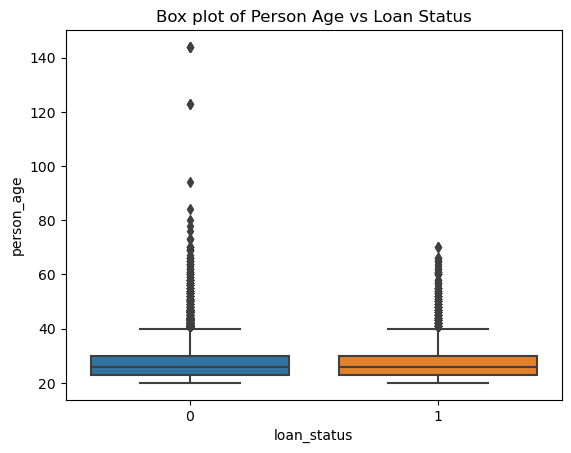

In [4]:
sns.boxplot(y="person_age", x="loan_status", data=df)
plt.title("Box plot of Person Age vs Loan Status")

# The points mentioned in the heading of boxplot mean the cordinates of position the title or caption within the visualization.
# he x-coordinate 0.5 would represent the horizontal midpoint of the graph, 
#while the y-coordinate 1.0 would represent the top of the graph.

In [5]:
df[df['person_age']> 100]
#The code df['person_age'] > 100 creates a Boolean (True/False) Series that has the same length as the 'person_age' column of df. 
# Each element in this Series is True if the corresponding age in the 'person_age' column is greater than 100, and False otherwise.
#The code df[df['person_age'] > 100] filters the DataFrame to include only the rows where the condition 'person_age' > 100 is True. 

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [6]:
df.shape
# Total number of rows and columns in original dataset

(32581, 12)

In [7]:
df = df[df['person_age']<=100]

In [8]:
df.shape
# 5 rows with outliers were excluded from dataset

(32576, 12)

- Box plot of Employment Length vs Loan Status shows there are a few persons > 60 years of experience. These can be considered as outliers as there is very less probability that they will take a new loan in the future. So, we will remove these records where Employment Length > 60

Text(0.5, 1.0, 'Box plot of Employment Length vs Loan Status')

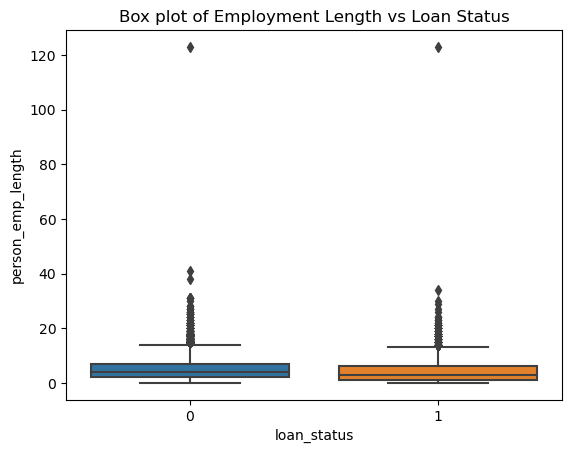

In [9]:
sns.boxplot(y="person_emp_length", x="loan_status", data=df)
plt.title("Box plot of Employment Length vs Loan Status")

In [10]:
df[df['person_emp_length']> 60]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [11]:
df = df[df['person_emp_length']!= 123]

In [12]:
df.shape

(32574, 12)

## 2b) Exploratory Data Analysis
- We have performed EDA to get a deeper understanding of our credit risk dataset
- EDA is an initial investigation using visualizations and plots that will help us discovers patterns in data, find actionable insights
- We have started with plotting the distribution for the target feature in our dataset
- Then we have done visualizations on categorical features in the dataset
- Finally, we have plotted the correlation plots for numerical features in the dataset

### The below plot shows the frequency distribution of Loan Status (0 = Non Default, 1 = Default) which is the traget variable in our dataset

Text(0.5, 1.0, 'Plot of Total Customers vs Loan Status')

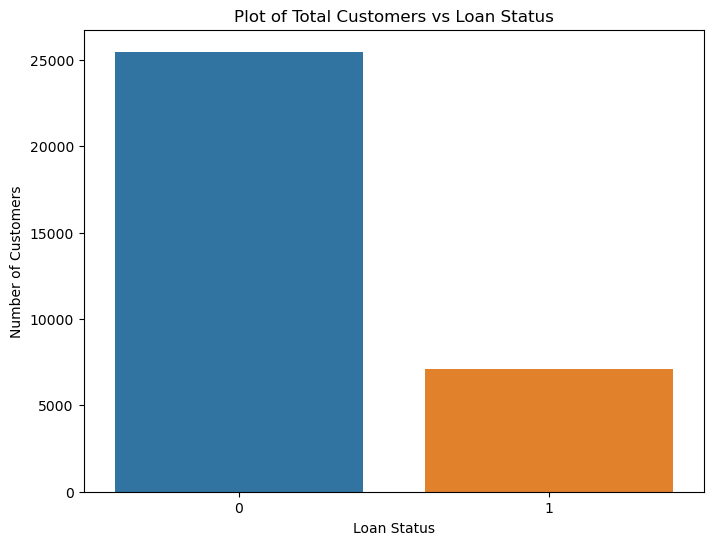

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='loan_status', data=df)
#plt.xticks(rotation=90)
plt.xlabel('Loan Status')
plt.ylabel('Number of Customers')
plt.title("Plot of Total Customers vs Loan Status")

### Below plot shows home ownership status:
- Most of the customers in the dataset have home ownership status of either Rent or Mortgage
- Based on the plot, we can see that majority of customers who are defaulting on their loan have the home ownership status as rent

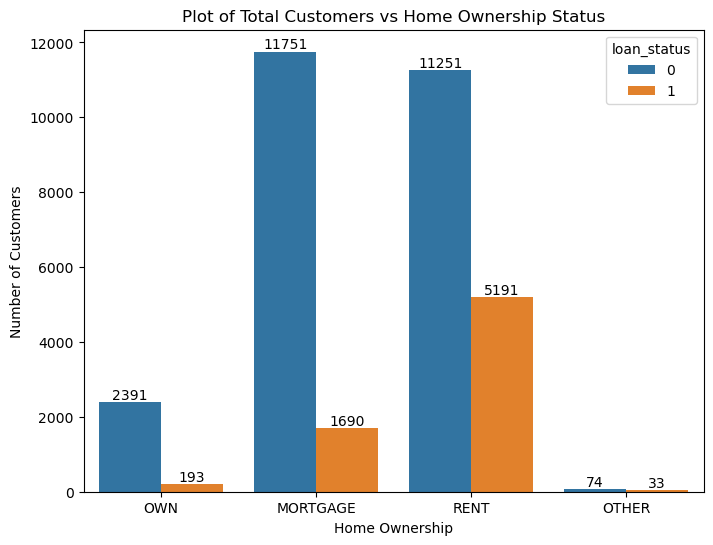

In [14]:
plt.figure(figsize=(8,6))
cnt_plt = sns.countplot(x='person_home_ownership', data=df, hue = 'loan_status')
#plt.xticks(rotation=90)
plt.xlabel('Home Ownership')
plt.ylabel('Number of Customers')
plt.title("Plot of Total Customers vs Home Ownership Status")
for container in cnt_plt.containers:
    cnt_plt.bar_label(container)

### Below plot shows Loan Intent:
- Majority of the customers in the dataset have taken a loan for education purpose 
- Based on the plot, we can see that majority of customers who are defaulting on their loan have taken a loan for medical purpose
- Least number of defaulters are the ones who have taken loan for venture

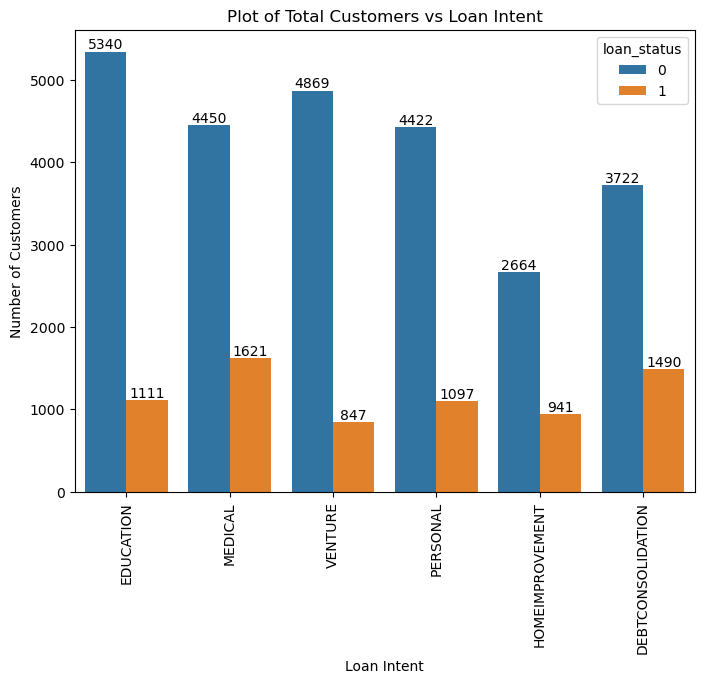

In [15]:
plt.figure(figsize=(8,6))
cnt_plt = sns.countplot(x='loan_intent', data=df, hue = 'loan_status')
plt.xticks(rotation=90)
plt.xlabel('Loan Intent')
plt.ylabel('Number of Customers')
plt.title("Plot of Total Customers vs Loan Intent")
for container in cnt_plt.containers:
    cnt_plt.bar_label(container)

### Below plot shows Loan Grade:
- Loan grade is calcuated based on a customers credit history. Grade A equals to a good credit history and Grade G is vice versa
- Below Scatterplot shows that the customers with Loan Grade = A are offered a loan at lowest interest rate
- We can also see that customers who are offred a loan at a higher interest rate tend to default on their loans majority of the times

Text(0.5, 1.0, 'Plot of Loan Interest Rate vs Loan Grade')

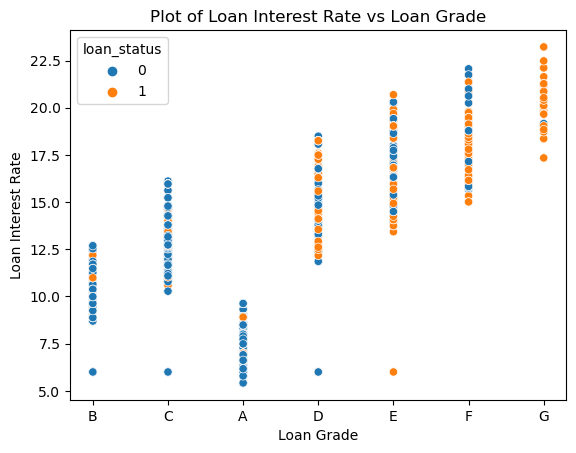

In [16]:
sns.scatterplot(x="loan_grade",
                    y="loan_int_rate",hue="loan_status",
                    data=df)
plt.xlabel('Loan Grade')
plt.ylabel('Loan Interest Rate')
plt.title("Plot of Loan Interest Rate vs Loan Grade")

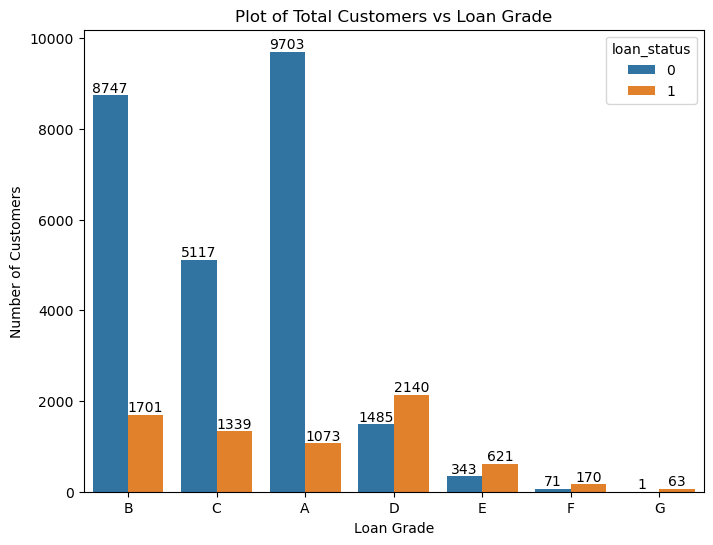

In [17]:
plt.figure(figsize=(8,6))
cnt_plt=sns.countplot(x='loan_grade', data=df, hue = 'loan_status')
#plt.xticks(rotation=90)
plt.xlabel('Loan Grade')
plt.ylabel('Number of Customers')
plt.title("Plot of Total Customers vs Loan Grade")
for container in cnt_plt.containers:
    cnt_plt.bar_label(container)

### Below plot shows person_default_on_file:
- In our dataset, there are around 5700 customers who have defaulted in the past
- Out of those, we can see that 2171 customers have again defaulted when they were provided with a loan

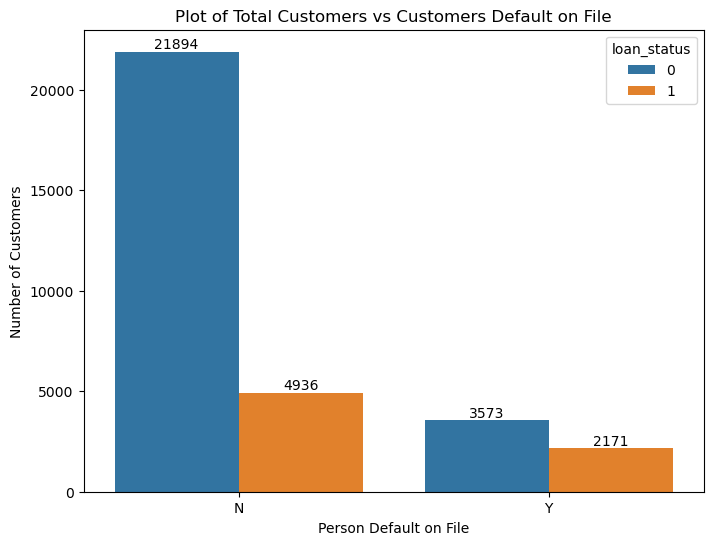

In [18]:
plt.figure(figsize=(8,6))
cnt_plt = sns.countplot(x='cb_person_default_on_file', data=df, hue = 'loan_status')
#plt.xticks(rotation=90)
plt.xlabel('Person Default on File')
plt.ylabel('Number of Customers')
plt.title("Plot of Total Customers vs Customers Default on File")
for container in cnt_plt.containers:
    cnt_plt.bar_label(container)

### Correlation Heatmap
- Covariance explains relationship between features / variables
- Correlation explains how strong that relationship is. Range (-1,1). Closer to -1 or 1 means stronger correlation. It can be postive or negative (inc in one leads to dec in other)
- We have plotted the correlation plot for all the numerical features in our dataset
- For example: loan_int rate seems to be positively correlated with loan status
- Person age is strongly positively correlated with person credit hostory length

<AxesSubplot:title={'center':'Correlation Matrix'}>

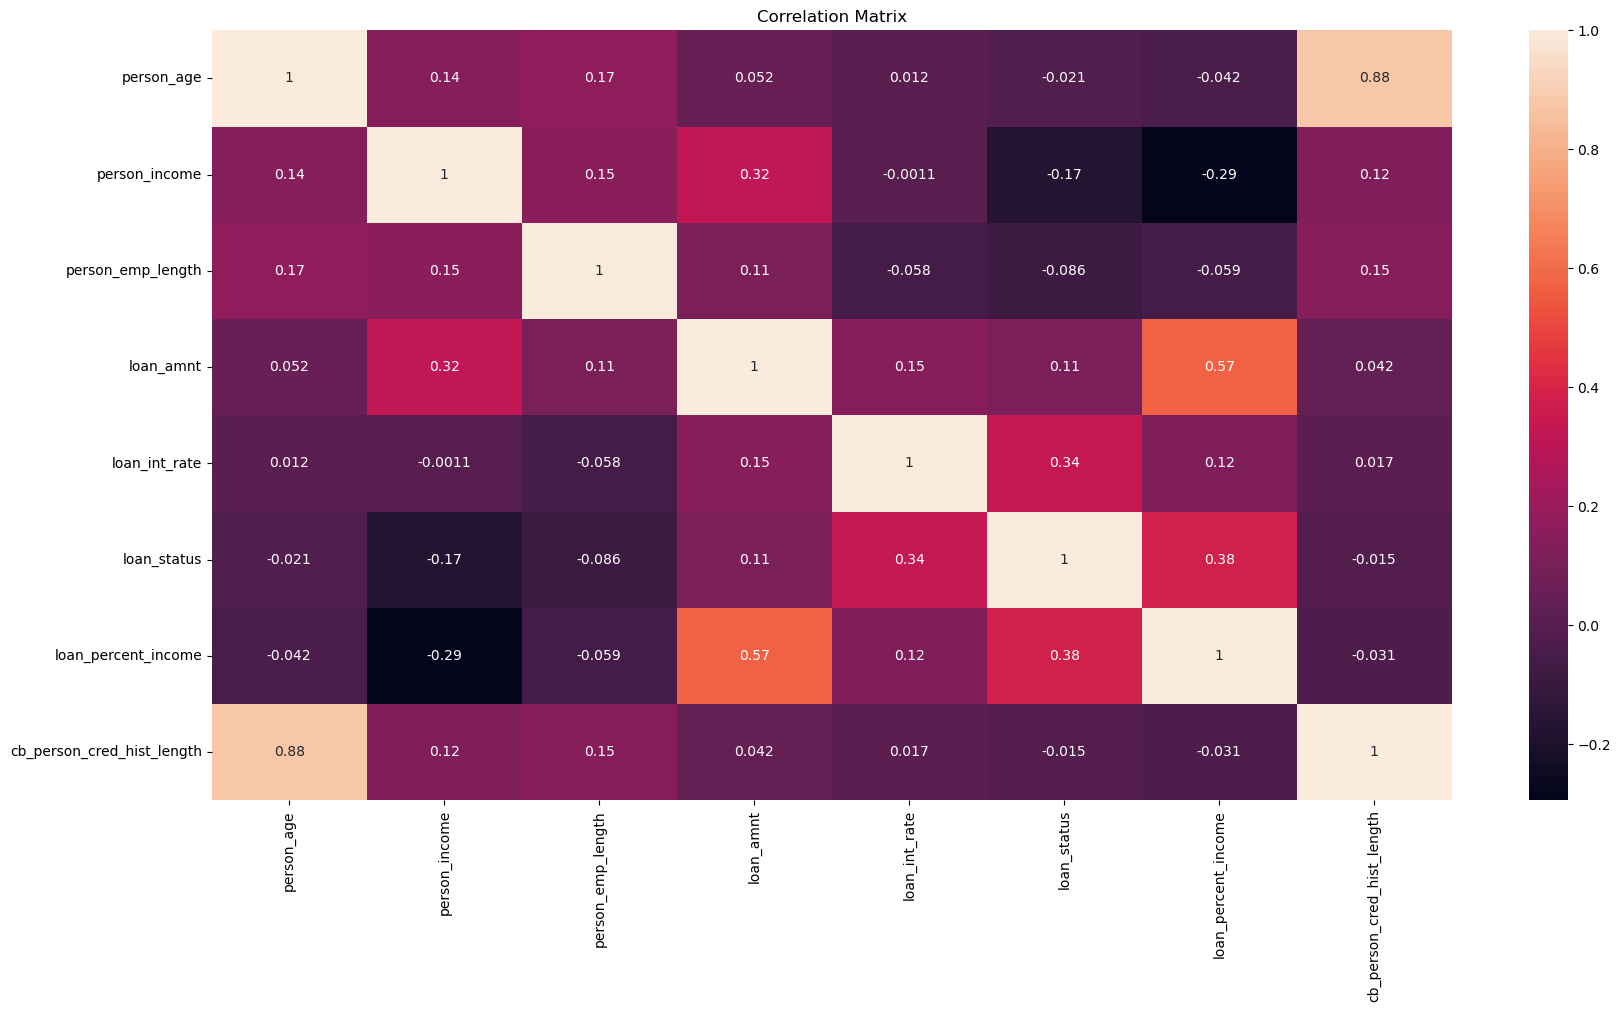

In [19]:
plt.figure(figsize=(20,10))
plt.title("Correlation Matrix")
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

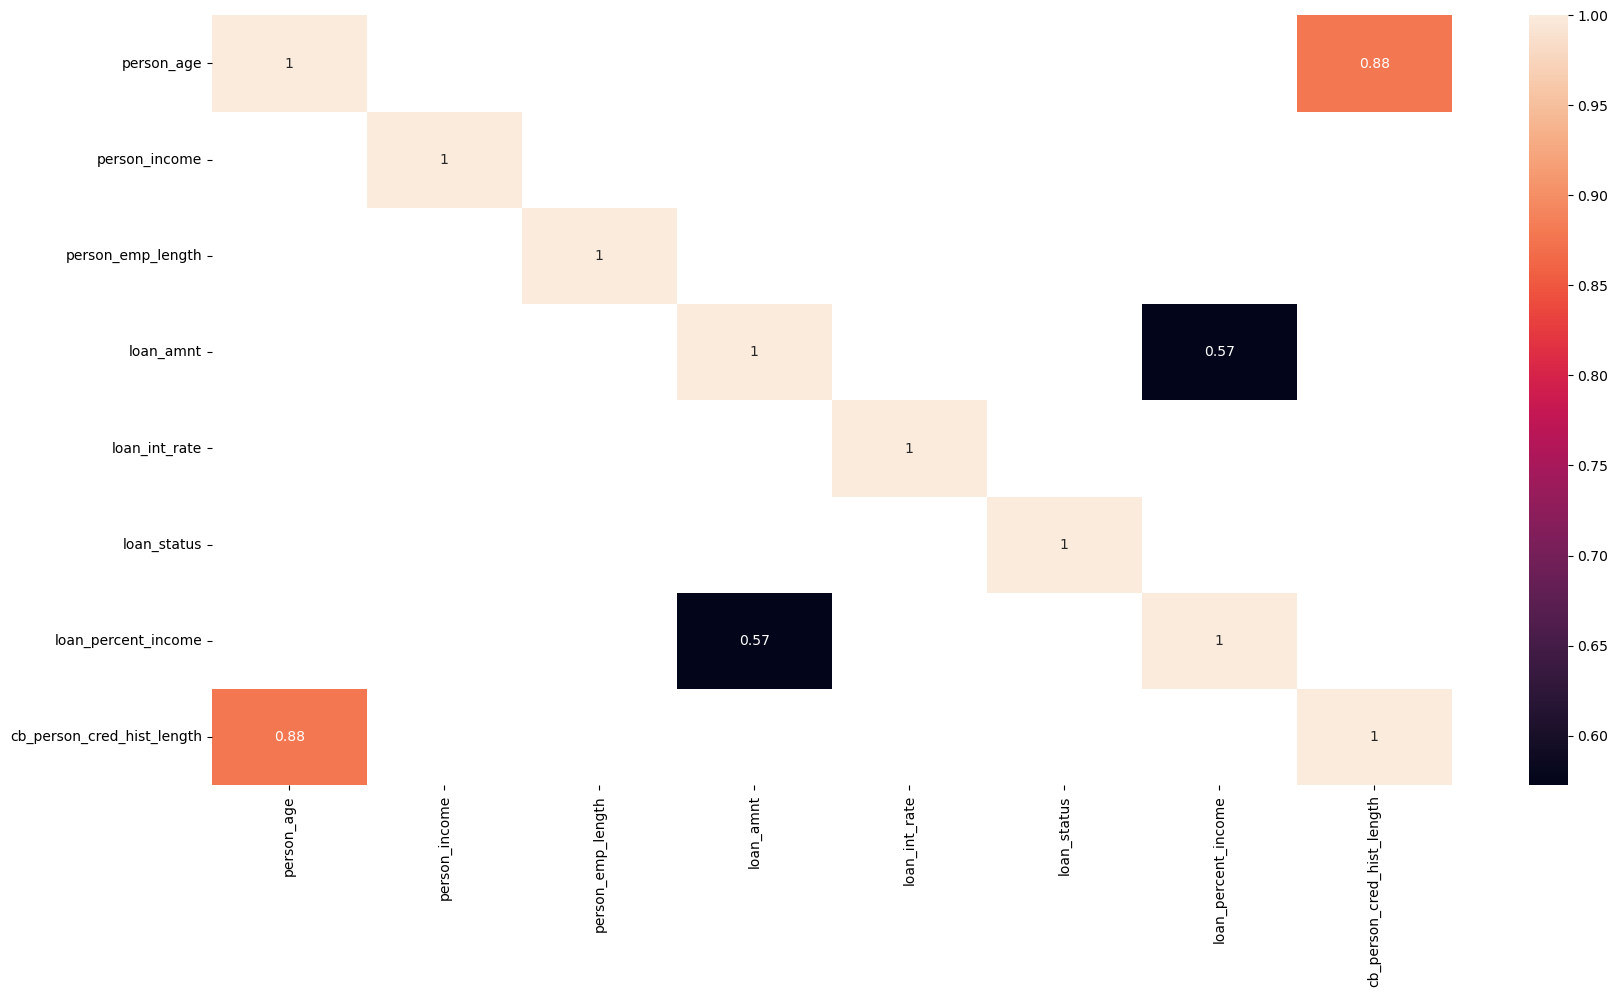

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr()[abs(df.corr())>.5],annot=True)

In [21]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4


## 2c) Handling Null Values 

In [22]:
# This will give the sum of null for each columns
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### Imputing Null Values
- For, loan_int_rate, we have imputed with the median of loan_int_rate by grouping them by the loan grade
- For, person employment length, we have used linear regression model to impute the missing values

### Column : Loan_int_rate - Handling Null using the median
- To handle to null values in loan_int, we are taking median value of loan_int_rate by grouping them by the loan_grade

In [23]:
df['loan_int_rate'].median()

10.99

In [24]:
#Here we are creating groups for each category of loan grade and taking median of each group
df.groupby('loan_grade')['loan_int_rate'].median()

loan_grade
A     7.490
B    10.990
C    13.480
D    15.310
E    16.820
F    18.535
G    20.160
Name: loan_int_rate, dtype: float64

In [25]:
# This will assign median values of each grade to missing values. inplace=true will make changes to same dataframe.
df['loan_int_rate'].fillna( df.groupby('loan_grade')['loan_int_rate'].transform('median'),inplace=True)  

In [26]:
df.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

### Column : person_emp_length - Handling Null using linear regression model
- Dummy Encoding or One hot Encoding
- Linear regression model

### Dummy Encoding or One hot Encoding 
- As linear model cannot read categorical features, we are performing this step.

In [27]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [28]:
categorical_columns = df.select_dtypes(['object']).columns

In [29]:
categorical_columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [30]:
# pd.get_dummies is a method to convert categorical variable to numerical variables, 
#drop_first=True means first column for each categorical variable will get dropped.
# And we drop first column to avoid redundancy
df = pd.get_dummies(df, columns = categorical_columns, drop_first=True)

In [31]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0


In [32]:
df.dtypes

person_age                       int64
person_income                    int64
person_emp_length              float64
loan_amnt                        int64
loan_int_rate                  float64
loan_status                      int64
loan_percent_income            float64
cb_person_cred_hist_length       int64
person_home_ownership_OTHER      uint8
person_home_ownership_OWN        uint8
person_home_ownership_RENT       uint8
loan_intent_EDUCATION            uint8
loan_intent_HOMEIMPROVEMENT      uint8
loan_intent_MEDICAL              uint8
loan_intent_PERSONAL             uint8
loan_intent_VENTURE              uint8
loan_grade_B                     uint8
loan_grade_C                     uint8
loan_grade_D                     uint8
loan_grade_E                     uint8
loan_grade_F                     uint8
loan_grade_G                     uint8
cb_person_default_on_file_Y      uint8
dtype: object

### Linear Regression Model for person_emp_length

In [33]:
df_lm = df[~df['person_emp_length'].isna()]
#This ~...isna() this will give all not null values for all columns.

In [34]:
## Linear regression to predict the person_emp_length using other features

# This will give all column names except person_emp_length

x_with_loan_status = [col for col in df_lm.columns if col != 'person_emp_length']

#Excluding loanstatus in the list of features :- 
#We should not include the target variable (y label) when using linear regression to impute 
#missing values in a column. This is because the target variable is the variable that you are trying to predict 
#or estimate, and including it in the list of features would essentially be using the target variable 
#to predict itself, which would not make sense.

x_model_cols = [col for col in x_with_loan_status if col != 'loan_status']

# split the dataset into training and testing sets
# This code uses train_test_split function from sklearn_model)selection module to split data
# df_lm[x_with_loan_status] - To train model.
# df_lm['person_emp_length']- To validate model
# test_size = 0.2 means 20% of the data is used for test
# random state means same data will be picked every time we run our program
X_train, X_test, y_train, y_test = train_test_split(df_lm[x_with_loan_status], df_lm['person_emp_length'], test_size=0.2, random_state=42)

# print the shapes of the training and testing sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# create a linear regression object
lr = LinearRegression()

# fit the linear regression model
lr.fit(X_train[x_model_cols], y_train)

# print the model coefficients
print(lr.intercept_, lr.coef_)


(25343, 22) (25343,)
(6336, 22) (6336,)
3.1371012717304514 [ 9.99620403e-02  1.38241526e-06  8.81858926e-05 -4.61690087e-02
 -3.55860301e+00 -5.71275481e-03 -1.76918043e+00 -3.96803106e-01
 -1.64145661e+00 -2.25026754e-01 -1.18042785e-01  8.16598155e-03
 -5.94712871e-02  7.62578310e-02 -2.67612571e-02 -1.11774570e-01
  1.28956003e-01 -1.55554515e-01 -5.38657945e-01  1.14879178e+00
  4.45566431e-03]


In [35]:
df_lm.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0


In [36]:
# Gives a predicted target values ; tolist() gives the output in form of list

pred = lr.predict(X_test[x_model_cols]).tolist()
actual = y_test.tolist()

#To calculate the difference between actual value and the predicted value

df_compare =  pd.DataFrame({'actual': actual, 'predicted': pred})
df_compare['diff'] = df_compare['actual']-df_compare['predicted']
df_compare.head()

,actual,predicted,diff
0,2.0,3.932661,-1.932661
1,11.0,6.611473,4.388527
2,11.0,4.829655,6.170345
3,3.0,3.846100,-0.846100
4,8.0,3.125367,4.874633


<AxesSubplot:>

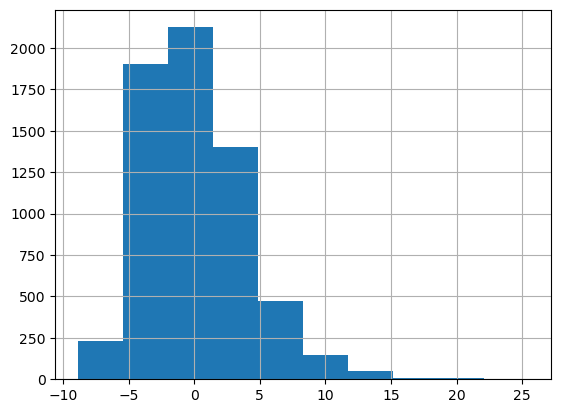

In [37]:
df_compare['diff'].hist()

In [38]:
# Filling the null value of person_emp_length with predicted values of Linear model

df_null = df[df['person_emp_length'].isna()]
df_null_model = df_null[x_model_cols]
df_null_predictions = lr.predict(df_null_model).tolist()
df_null_predictions= [round(i) for i in df_null_predictions]
df_null['person_emp_length'] = df_null_predictions
df_null.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
105,22,12600,5,2000,5.42,1,0.16,4,0,0,...,0,1,0,0,0,0,0,0,0,0
222,24,185000,7,35000,12.42,0,0.19,2,0,0,...,0,0,0,1,0,0,0,0,0,0
379,24,16800,5,3900,7.49,1,0.23,3,0,0,...,0,0,0,0,0,0,0,0,0,0
407,25,52000,4,24000,10.74,1,0.46,2,0,0,...,0,1,0,1,0,0,0,0,0,0
408,22,17352,4,2250,15.27,0,0.13,3,0,0,...,0,0,0,0,1,0,0,0,0,1


In [39]:
# Concatinating the null data frame with non null data frame 

df = pd.concat([df_lm,df_null],axis=0)
df.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0


In [40]:
df.isna().sum()

person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
loan_status                    0
loan_percent_income            0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
loan_grade_B                   0
loan_grade_C                   0
loan_grade_D                   0
loan_grade_E                   0
loan_grade_F                   0
loan_grade_G                   0
cb_person_default_on_file_Y    0
dtype: int64

In [41]:
df.shape

(32574, 23)

## 2d) Feature Engineering :
- Feature engineering is the process of selecting and transforming raw data into a format that can be effectively used by machine learning algorithms to make predictions or classifications. In other words, it involves creating features, or input variables, that capture the relevant characteristics of the data in a way that allows a machine learning model to learn from it and make accurate predictions.The process of feature engineering often involves several steps, including data preprocessing, feature selection, feature extraction, and feature transformation. These steps may involve techniques such as data cleaning, normalization, one-hot encoding, dimensionality reduction, and others.Good feature engineering is essential for creating accurate and effective machine learning models, as it can significantly impact the performance of the model. 

###  i) Binning Person Age and Employment Length Features

In [42]:
print('Minimum Person Age in the dataset: ', df['person_age'].min())
print('Maximum Person Age in the dataset: ', df['person_age'].max())

Minimum Person Age in the dataset:  20
Maximum Person Age in the dataset:  94


In [43]:
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80', '80-90', '90-100']
df['person_age_binned'] = pd.cut(df['person_age'], bins=bins, labels=labels, include_lowest=True)
#include_lowest = True for including the lowest value in the first bin

In [44]:
# drop original person age feature; axis=1(means remove column); inplace=True means make changes to same dataframe
df.drop(['person_age'],axis=1, inplace=True)

In [45]:
df.tail(10)

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,person_age_binned
32115,48000,7.0,3000,5.42,0,0.06,16,0,0,0,...,0,0,0,0,0,0,0,0,0,30-40
32139,21408,6.0,1500,11.12,0,0.07,17,0,0,0,...,0,0,1,0,0,0,0,0,0,30-40
32242,43439,5.0,15000,12.73,1,0.35,15,0,0,1,...,0,1,0,1,0,0,0,0,1,40-50
32264,51600,5.0,1500,11.86,0,0.03,12,0,0,1,...,0,1,1,0,0,0,0,0,0,40-50
32274,30132,4.0,3000,13.85,1,0.10,14,0,0,1,...,0,0,0,1,0,0,0,0,1,30-40
32285,12000,5.0,4800,7.29,1,0.40,12,0,1,0,...,0,0,0,0,0,0,0,0,0,30-40
32328,18408,6.0,1000,14.65,1,0.05,20,0,0,1,...,1,0,0,1,0,0,0,0,1,50-60
32360,39996,8.0,3600,15.23,0,0.09,19,0,0,1,...,0,0,0,1,0,0,0,0,1,60-70
32453,32400,7.0,8575,7.51,0,0.26,18,0,0,1,...,0,0,0,0,0,0,0,0,0,50-60
32471,54000,6.0,10000,14.59,1,0.19,27,0,0,1,...,0,0,0,0,1,0,0,0,1,50-60


In [46]:
print('Minimum Employment Length in the dataset: ', df['person_emp_length'].min())
print('Maximum Employment Length in the dataset: ', df['person_emp_length'].max())

Minimum Employment Length in the dataset:  0.0
Maximum Employment Length in the dataset:  41.0


In [47]:
bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '10-20', '20-30','30-40','40-50']
df['person_emp_length_binned'] = pd.cut(df['person_emp_length'], bins=bins, labels=labels, include_lowest=True)

In [48]:
# drop original person emp length feature
df.drop(['person_emp_length'],axis=1, inplace=True)

In [49]:
df.tail(10)

,person_income,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,...,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,person_age_binned,person_emp_length_binned
32115,48000,3000,5.42,0,0.06,16,0,0,0,0,...,0,0,0,0,0,0,0,0,30-40,0-10
32139,21408,1500,11.12,0,0.07,17,0,0,0,0,...,0,1,0,0,0,0,0,0,30-40,0-10
32242,43439,15000,12.73,1,0.35,15,0,0,1,0,...,1,0,1,0,0,0,0,1,40-50,0-10
32264,51600,1500,11.86,0,0.03,12,0,0,1,0,...,1,1,0,0,0,0,0,0,40-50,0-10
32274,30132,3000,13.85,1,0.10,14,0,0,1,0,...,0,0,1,0,0,0,0,1,30-40,0-10
32285,12000,4800,7.29,1,0.40,12,0,1,0,1,...,0,0,0,0,0,0,0,0,30-40,0-10
32328,18408,1000,14.65,1,0.05,20,0,0,1,0,...,0,0,1,0,0,0,0,1,50-60,0-10
32360,39996,3600,15.23,0,0.09,19,0,0,1,0,...,0,0,1,0,0,0,0,1,60-70,0-10
32453,32400,8575,7.51,0,0.26,18,0,0,1,0,...,0,0,0,0,0,0,0,0,50-60,0-10
32471,54000,10000,14.59,1,0.19,27,0,0,1,0,...,0,0,0,1,0,0,0,1,50-60,0-10


### ii) Exploratory Data Analysis after binning column person_age

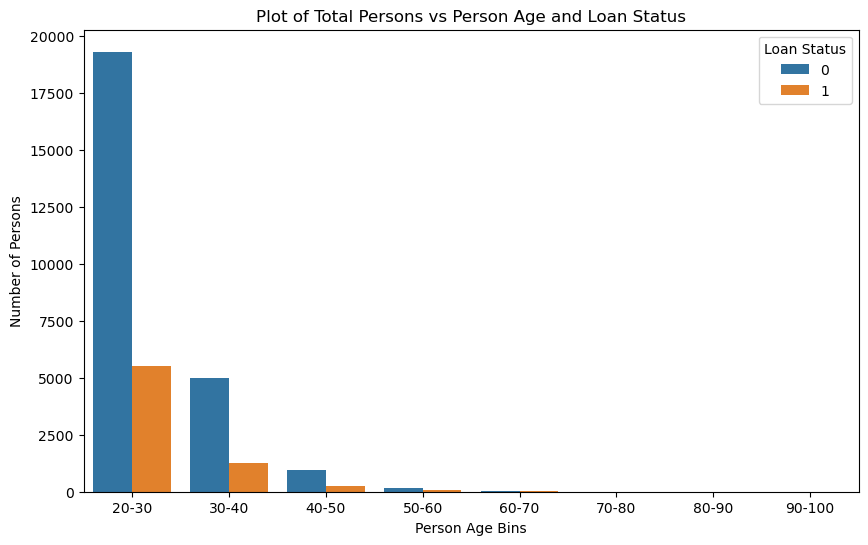

In [50]:
plt.figure(figsize=(10,6))
#The hue parameter adds a categorical variable to the plot by coloring the bars according to the different loan statuses.
sns.countplot(x='person_age_binned', data=df, hue='loan_status')
# plt.xticks(rotation=90)
plt.xlabel('Person Age Bins')
plt.ylabel('Number of Persons')
plt.title("Plot of Total Persons vs Person Age and Loan Status")
# The loc parameter specifies the location of the legend on the plot, 
#in this case it is set to 'upper right'. Other possible values for loc include 'upper left', 'lower right', 'lower left', 'center', and more.
plt.legend(loc='upper right', title='Loan Status')

### iii) Exploratory Data Analysis after binning column employment_length

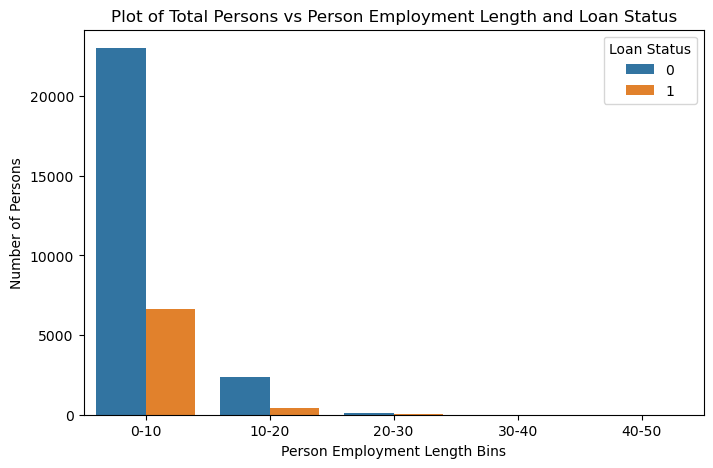

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(x='person_emp_length_binned', data=df, hue='loan_status')
# plt.xticks(rotation=90)
plt.xlabel('Person Employment Length Bins')
plt.ylabel('Number of Persons')
plt.title("Plot of Total Persons vs Person Employment Length and Loan Status")
plt.legend(loc='upper right', title='Loan Status')

### iv) Dummy Encoding or One-Hot Encoding for binned columns :
- Both dummy encoding and one-hot encoding can be used to encode binned columns, but one-hot encoding is generally preferred because it avoids multicollinearity and is more widely used in machine learning. 

- We have applied One Hot Encoding to the following :
1.  person_age_binned 
2. person_emp_length_binned

In [52]:
df.dtypes

person_income                     int64
loan_amnt                         int64
loan_int_rate                   float64
loan_status                       int64
loan_percent_income             float64
cb_person_cred_hist_length        int64
person_home_ownership_OTHER       uint8
person_home_ownership_OWN         uint8
person_home_ownership_RENT        uint8
loan_intent_EDUCATION             uint8
loan_intent_HOMEIMPROVEMENT       uint8
loan_intent_MEDICAL               uint8
loan_intent_PERSONAL              uint8
loan_intent_VENTURE               uint8
loan_grade_B                      uint8
loan_grade_C                      uint8
loan_grade_D                      uint8
loan_grade_E                      uint8
loan_grade_F                      uint8
loan_grade_G                      uint8
cb_person_default_on_file_Y       uint8
person_age_binned              category
person_emp_length_binned       category
dtype: object

In [53]:
categorical_columns = df.select_dtypes(['category']).columns

In [54]:
categorical_columns

Index(['person_age_binned', 'person_emp_length_binned'], dtype='object')

In [55]:
df = pd.get_dummies(df, columns = categorical_columns, drop_first=True)

In [56]:
df.tail(10)

,person_income,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,...,person_age_binned_40-50,person_age_binned_50-60,person_age_binned_60-70,person_age_binned_70-80,person_age_binned_80-90,person_age_binned_90-100,person_emp_length_binned_10-20,person_emp_length_binned_20-30,person_emp_length_binned_30-40,person_emp_length_binned_40-50
32115,48000,3000,5.42,0,0.06,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32139,21408,1500,11.12,0,0.07,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32242,43439,15000,12.73,1,0.35,15,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
32264,51600,1500,11.86,0,0.03,12,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
32274,30132,3000,13.85,1,0.10,14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
32285,12000,4800,7.29,1,0.40,12,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
32328,18408,1000,14.65,1,0.05,20,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
32360,39996,3600,15.23,0,0.09,19,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
32453,32400,8575,7.51,0,0.26,18,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
32471,54000,10000,14.59,1,0.19,27,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [57]:
df.dtypes

person_income                       int64
loan_amnt                           int64
loan_int_rate                     float64
loan_status                         int64
loan_percent_income               float64
cb_person_cred_hist_length          int64
person_home_ownership_OTHER         uint8
person_home_ownership_OWN           uint8
person_home_ownership_RENT          uint8
loan_intent_EDUCATION               uint8
loan_intent_HOMEIMPROVEMENT         uint8
loan_intent_MEDICAL                 uint8
loan_intent_PERSONAL                uint8
loan_intent_VENTURE                 uint8
loan_grade_B                        uint8
loan_grade_C                        uint8
loan_grade_D                        uint8
loan_grade_E                        uint8
loan_grade_F                        uint8
loan_grade_G                        uint8
cb_person_default_on_file_Y         uint8
person_age_binned_30-40             uint8
person_age_binned_40-50             uint8
person_age_binned_50-60           

In [58]:
df.shape

(32574, 32)

# 3) Model Building - Phase 1
- Here, we have performed some pre-processing steps required for all of our machine learning models

- We have performed a train-test split on our training dataset using 70-30 as the size. This will help prevent our models from overfitting and we will also be able to perform hyper-parameter tuning on training set

Models used are as below: 
- Logistic Regression
- Decision Tree
- Random Forest


### Evaluation Metric: Recall
- For credit risk classification problem statement, it is extremely important for our models to reduce the number of 'false-negatives'. We do not want our models to predict a customer as 'non defaulter' when that customer actually 'is a defaulter'

### 3a) Logistic Regression

In [59]:
x = [col for col in df.columns if col != 'loan_status']

X_train, X_test, Y_train, Y_test = train_test_split(df[x], df['loan_status'], test_size=0.30, random_state=9)

lg=LogisticRegression()
lg.fit(X_train,Y_train)

print(lg.intercept_, lg.coef_)

[-2.29022612e-09] [[-4.07846364e-05  1.08781500e-04  9.29956831e-08  2.57902988e-09
  -9.17844794e-09  8.17898218e-11 -4.04161804e-09  7.94799612e-09
  -2.98305674e-09  2.03053491e-09  1.18704117e-09 -1.35434723e-09
  -3.81915528e-09 -5.64205110e-09 -1.43049219e-09  1.07639989e-08
   3.56095613e-09  1.04823365e-09  4.27606534e-10  7.28991466e-09
  -5.37541264e-10  2.12865599e-11  8.53882512e-11  5.20718987e-11
  -1.18116598e-11 -1.24211238e-12 -4.67813938e-12 -3.81991014e-10
   4.20662935e-11  7.25265463e-12 -2.93298370e-12]]


In [60]:
pred = lg.predict(X_test)
actual = Y_test
accuracy = accuracy_score(actual,pred)
precision = precision_score(actual,pred)
recall = recall_score(actual,pred)
f1 = f1_score(actual, pred)
print('Accuracy of Logistic Regression: ' + str(accuracy))
print('Precision of Logistic Regression: ' + str(precision))
print('Recall of Logistic Regression: ' + str(recall))
print('F1 Score of Logistic Regression: ' + str(f1))

Accuracy of Logistic Regression: 0.8084518571574747
Precision of Logistic Regression: 0.7207392197125256
Recall of Logistic Regression: 0.16818399616674654
F1 Score of Logistic Regression: 0.27272727272727276


In [61]:
conf_matrix = confusion_matrix(actual,pred)
conf_matrix

array([[7550,  136],
       [1736,  351]], dtype=int64)

### 3b) Decision Tree

In [62]:
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4)

In [63]:
pred = dt_clf.predict(X_test)
actual = Y_test
accuracy = accuracy_score(actual,pred)
precision = precision_score(actual,pred)
recall = recall_score(actual,pred)
f1 = f1_score(actual, pred)
print('Accuracy of Decision Tree: ' + str(accuracy))
print('Precision of Decision Tree: ' + str(precision))
print('Recall of Decision Tree: ' + str(recall))
print('F1 Score of Decision Tree: ' + str(f1))

Accuracy of Decision Tree: 0.8892868106006344
Precision of Decision Tree: 0.9088689991863304
Recall of Decision Tree: 0.5352180162913273
F1 Score of Decision Tree: 0.6737032569360676


In [64]:
conf_matrix = confusion_matrix(actual,pred)
conf_matrix

array([[7574,  112],
       [ 970, 1117]], dtype=int64)

### 3c) Random Forest

In [65]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [66]:
pred = rf_clf.predict(X_test)
actual = Y_test
accuracy = accuracy_score(actual,pred)
precision = precision_score(actual,pred)
recall = recall_score(actual,pred)
f1 = f1_score(actual, pred)
print('Accuracy of Random Forest: ' + str(accuracy))
print('Precision of Random Forest: ' + str(precision))
print('Recall of Random Forest: ' + str(recall))
print('F1 Score of Random Forest: ' + str(f1))

Accuracy of Random Forest: 0.9210068556226337
Precision of Random Forest: 0.8916021441334128
Recall of Random Forest: 0.7172975563009104
F1 Score of Random Forest: 0.7950079660116836


In [67]:
conf_matrix = confusion_matrix(actual,pred)
conf_matrix

array([[7504,  182],
       [ 590, 1497]], dtype=int64)

###  Summary of model performance

In [69]:
# Creating a summary table for the model names, their recall, accuracy scores, Precision and F1 Score
best_models1 = pd.DataFrame({"Classification Model":["Logistic Regression","Decision Tree","Random Forest",],
                            "Accuracy":[80.84,88.92,92.10],
                            "Precision": [72.07, 90.88,89.16],
                            "Recall":[16.81,53.52,71.72],
                            "F1 Score": [27.27, 67.37, 79.50]
                           })

In [70]:
# Printing the best_models summary table sorted by Recall
best_models1.sort_values(by="Recall",ascending=False)

,Classification Model,Accuracy,Precision,Recall,F1 Score
2,Random Forest,92.10,89.16,71.72,79.50
1,Decision Tree,88.92,90.88,53.52,67.37
0,Logistic Regression,80.84,72.07,16.81,27.27


### Conclusion : We can see that except random forest, other machine learning models do not have good recall score. So to fix this, we are going to handle the imbalance in our data set with respect to target variable loan-status.

## 4) Under Sampling: Handling Imbalanced Dataset Issue
- Loan Status target feature in the dataset is highly imbalanced. Before training ML models, we need to handle this imbalanced dataset problem using undersampling techniques
- We have brought down the count of overrepresented classes to match the count of underrepresented classes using a random sample which has been extracted from the original dataset

Text(0.5, 1.0, 'Distribution of Loan Status for our dataset')

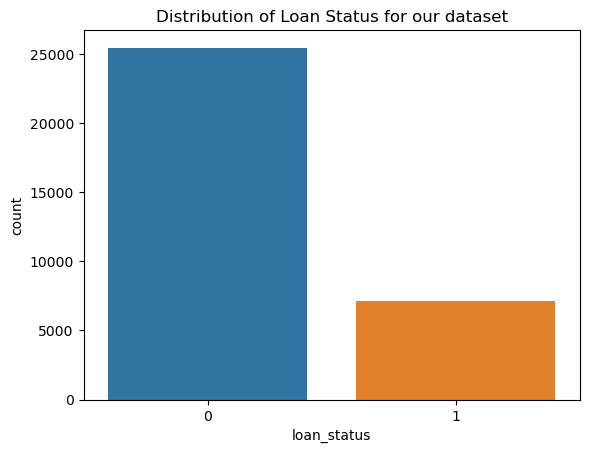

In [71]:
sns.countplot(x="loan_status", data=df).set_title('Distribution of Loan Status for our dataset')

In [72]:
df['loan_status'].value_counts()

0    25467
1     7107
Name: loan_status, dtype: int64

In [73]:
# normalize=True --> This normalizes the counts to represent proportions which means dividing each value by total number of observations
df['loan_status'].value_counts(normalize=True) * 100

0    78.181986
1    21.818014
Name: loan_status, dtype: float64

In [74]:
# .apply(lambda x: x.sample(n=7107, random_state=1)) --> This applies a function to each group that takes a 
# random sample of 7107 rows from that group (using a fixed random seed of 1).
# .reset_index(drop = True)--> This resets the index of the resulting DataFrame so that it starts from 0 and drops the previous group labels.
sample_df = df.groupby('loan_status').apply(lambda x: x.sample(n=7107, random_state=1)).reset_index(drop = True)

In [75]:
sample_df.head(10)

,person_income,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,...,person_age_binned_40-50,person_age_binned_50-60,person_age_binned_60-70,person_age_binned_70-80,person_age_binned_80-90,person_age_binned_90-100,person_emp_length_binned_10-20,person_emp_length_binned_20-30,person_emp_length_binned_30-40,person_emp_length_binned_40-50
0,83000,14000,8.49,0,0.17,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,110004,15000,10.99,0,0.14,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,42000,5000,11.91,0,0.12,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,50004,8000,12.73,0,0.16,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,45204,5000,9.63,0,0.11,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,60000,12000,7.90,0,0.20,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,48000,14550,9.62,0,0.30,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,60000,3500,5.42,0,0.06,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,67450,4000,6.76,0,0.06,3,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,54000,4800,12.99,0,0.09,10,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Distribution of Loan Status for our dataset')

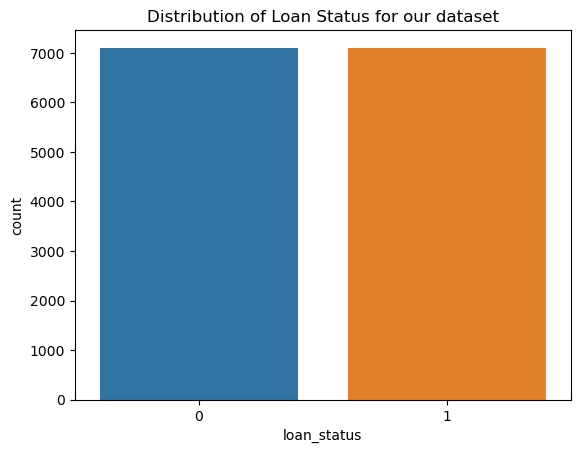

In [76]:
sns.countplot(x="loan_status", data=sample_df).set_title('Distribution of Loan Status for our dataset')

In [77]:
sample_df['loan_status'].value_counts()

0    7107
1    7107
Name: loan_status, dtype: int64

In [78]:
sample_df.shape

(14214, 32)

# 5) Model Building - Phase 2
- Now we have handled the imbalanced data using the above under sampling technique.

- We have performed a train-test split on our training dataset using 70-30 as the size. This will help prevent our models from overfitting and we will also be able to perform hyper-parameter tuning on training set

Models used are as below: 
- Logistic Regression
- Decision Tree
- Random Forest


### Evaluation Metric: Recall
- For credit risk classification problem statement, it is extremely important for our models to reduce the number of 'false-negatives'. We do not want our models to predict a customer as 'non defaulter' when that customer actually 'is a defaulter'

### 5a) Logistic Regression

In [79]:
x = [col for col in sample_df.columns if col != 'loan_status']

X_train, X_test, Y_train, Y_test = train_test_split(sample_df[x], sample_df['loan_status'], test_size=0.30, random_state=9)

lg=LogisticRegression()
lg.fit(X_train,Y_train)

print(lg.intercept_, lg.coef_)

[-0.00776644] [[-3.45835013e-05  8.23177730e-05  1.28531000e-01  1.27405422e-03
  -5.11338247e-02  1.48272123e-04 -8.91495908e-03  1.50243789e-02
  -6.76033024e-03  3.78565367e-03  1.90881335e-03 -3.27888073e-03
  -9.82720382e-03 -1.53490503e-02 -6.30132624e-03  2.31545173e-02
   7.13543055e-03  1.62797298e-03  7.14683122e-04  1.32221175e-02
  -1.42794424e-03 -6.86878655e-04  1.95905185e-04  1.02187255e-04
  -2.50384174e-05  0.00000000e+00  0.00000000e+00 -1.57848936e-03
  -1.44931426e-05 -2.13355410e-05  0.00000000e+00]]


In [80]:
pred = lg.predict(X_test)
actual = Y_test
accuracy = accuracy_score(actual,pred)
precision = precision_score(actual,pred)
recall = recall_score(actual,pred)
f1 = f1_score(actual, pred)
print('Accuracy of Logistic Regression: ' + str(accuracy))
print('Precision of Logistic Regression: ' + str(precision))
print('Recall of Logistic Regression: ' + str(recall))
print('F1 Score of Logistic Regression: ' + str(f1))

Accuracy of Logistic Regression: 0.7188745603751465
Precision of Logistic Regression: 0.6957217113154738
Recall of Logistic Regression: 0.7988980716253443
F1 Score of Logistic Regression: 0.7437486642444967


In [81]:
conf_matrix = confusion_matrix(actual,pred)
conf_matrix

array([[1326,  761],
       [ 438, 1740]], dtype=int64)

### 5b) Decision Tree

In [82]:
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4)

In [83]:
pred = dt_clf.predict(X_test)
actual = Y_test
accuracy = accuracy_score(actual,pred)
precision = precision_score(actual,pred)
recall = recall_score(actual,pred)
f1 = f1_score(actual, pred)
print('Accuracy of Decision Tree: ' + str(accuracy))
print('Precision of Decision Tree: ' + str(precision))
print('Recall of Decision Tree: ' + str(recall))
print('F1 Score of Decision Tree: ' + str(f1))

Accuracy of Decision Tree: 0.830715123094959
Precision of Decision Tree: 0.9307692307692308
Recall of Decision Tree: 0.7222222222222222
F1 Score of Decision Tree: 0.813340227507756


In [84]:
conf_matrix = confusion_matrix(actual,pred)
conf_matrix

array([[1970,  117],
       [ 605, 1573]], dtype=int64)

### 5c) Random Forest

In [85]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [86]:
pred = rf_clf.predict(X_test)
actual = Y_test
accuracy = accuracy_score(actual,pred)
precision = precision_score(actual,pred)
recall = recall_score(actual,pred)
f1 = f1_score(actual, pred)
print('Accuracy of Random Forest: ' + str(accuracy))
print('Precision of Random Forest: ' + str(precision))
print('Recall of Random Forest: ' + str(recall))
print('F1 Score of Random Forest: ' + str(f1))

Accuracy of Random Forest: 0.8508792497069168
Precision of Random Forest: 0.8933673469387755
Recall of Random Forest: 0.8039485766758494
F1 Score of Random Forest: 0.8463025616239729


In [87]:
conf_matrix = confusion_matrix(actual,pred)
conf_matrix

array([[1878,  209],
       [ 427, 1751]], dtype=int64)

###  Summary of model performance

In [88]:
# Creating a summary table for the model names, their recall, accuracy scores, Precision and F1 Score
best_models1 = pd.DataFrame({"Classification Model":["Logistic Regression","Decision Tree","Random Forest",],
                            "Accuracy":[71.88, 83.07, 85.08],
                            "Precision": [69.67, 93.07, 89.33],
                            "Recall":[79.88, 72.22, 80.39],
                            "F1 Score": [74.37, 81.33, 84.63]
                           })

In [89]:
# Printing the best_models summary table sorted by Recall
best_models1.sort_values(by="Recall",ascending=False)

,Classification Model,Accuracy,Precision,Recall,F1 Score
2,Random Forest,85.08,89.33,80.39,84.63
0,Logistic Regression,71.88,69.67,79.88,74.37
1,Decision Tree,83.07,93.07,72.22,81.33


In [90]:
# Feature importance calculation
importances = rf_clf.feature_importances_
for feature, importance in zip(X_train.columns, importances):
    print(f"{feature}: {importance}")

    
# The most important features are : loan_percent_income, loan_int_rate, person_income, loan_amt

person_income: 0.1812862187566861
loan_amnt: 0.10495669070310419
loan_int_rate: 0.16435668156371705
loan_percent_income: 0.2106519745611995
cb_person_cred_hist_length: 0.05583672990191847
person_home_ownership_OTHER: 0.0009805638906720752
person_home_ownership_OWN: 0.01527150722750541
person_home_ownership_RENT: 0.05486219291896019
loan_intent_EDUCATION: 0.012862045260456064
loan_intent_HOMEIMPROVEMENT: 0.014177382305149498
loan_intent_MEDICAL: 0.010172456353441493
loan_intent_PERSONAL: 0.011282356841790929
loan_intent_VENTURE: 0.014586650750933258
loan_grade_B: 0.008363894014828975
loan_grade_C: 0.017580724250153543
loan_grade_D: 0.05567051883543703
loan_grade_E: 0.017960275186350603
loan_grade_F: 0.004518766899565547
loan_grade_G: 0.001712024886471856
cb_person_default_on_file_Y: 0.02035405366694328
person_age_binned_30-40: 0.009689760549290705
person_age_binned_40-50: 0.0036136445218304288
person_age_binned_50-60: 0.0008860474211393721
person_age_binned_60-70: 0.00026581058226904245